In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm, poisson
from scipy import stats
from scipy.stats import kurtosis, skew
import seaborn as sns
import pandas as pd


In [2]:
number_cells =12 # O(n2) ?
number_generations = 1000# O(n)
N = 10000 #resample per cell #(n) 
kenerations = 100
sigma_0 = 2

In [3]:
#null model free restriction 
hist=[]
for k in range(kenerations):
    print(k)
    mu = [0] * number_cells
    sigma = [sigma_0] * number_cells
    s=[0] * number_cells
    mus=[mu]
    for trial in range(number_generations):
        temp_mu = [0] * number_cells
        temp_sigma = [1] * number_cells 
        for i, mean in enumerate(mu):

            s[i] = np.random.normal(loc=mean,scale=sigma[i],size=N)
            mu_loop = mu[:i] + mu[i+1:]
            for j, meanj in enumerate(mu_loop):
                np.append(s[i],np.random.normal(loc=mean,scale=sigma[i],size=N))
            temp_mu[i] = round(np.mean(s[i]),2)
            temp_sigma[i] = round(np.std(s[i]),2)

        mu = temp_mu
        sigma = temp_sigma
        mus.append(mu)
    mus = pd.DataFrame(mus,columns=range(number_cells),index=range(number_generations+1))
    #s = sns.heatmap(mus,cmap="PiYG");
    #s.set(xlabel='Cells',ylabel='Generations')
    #s;
    #print(sigma[0]/2+sigma[-1]/2)
    hist.append((mus.iloc[number_generations-1,0]-mus.iloc[number_generations-1,8])/kenerations)
print(hist)
plt.hist(hist,bins='auto')
plt.xlabel("Change in mean from first (0th) and last cell (8th)")
plt.ylabel("frequency")
plt.savefig('../data/null_low_restriction'+str(sigma_0)+'.png')

0
1
2


KeyboardInterrupt: 

0
0.8999999999999999
1
1.1
2
0.935
3
1.06
4
0.71
5
0.67
6
0.98
7
0.9450000000000001
8
1.425
9
0.905
10
0.975
11
1.03
12
0.765
13
0.73
14
1.065
15
0.9450000000000001
16
0.8700000000000001
17
1.08
18
1.085
19
0.775
20
0.93
21
0.75
22
0.73
23
1.1949999999999998
24
0.675
25
0.665
26
0.685
27
1.0
28
1.395
29
0.96
30
0.745
31
1.405
32
0.875
33
0.875
34
0.86
35
1.07
36
0.9
37
1.12
38
0.8500000000000001
39
0.84
40
0.89
41
1.125
42
0.7
43
0.755
44
0.98
45
0.73
46
0.7050000000000001
47
0.71
48
1.115
49
1.1099999999999999
50
0.8
51
0.96
52
0.775
53
1.0
54
0.75
55
1.0899999999999999
56
0.8699999999999999
57
0.97
58
1.26
59
0.9099999999999999
60
0.98
61
1.115
62
0.915
63
1.0050000000000001
64
0.86
65
1.135
66
0.8200000000000001
67
0.995
68
0.99
69
1.33
70
1.045
71
0.8999999999999999
72
1.15
73
0.96
74
0.815
75
0.95
76
0.635
77
0.8400000000000001
78
1.13
79
0.95
80
1.06
81
0.6799999999999999
82
1.075
83
1.115
84
0.95
85
0.9400000000000001
86
0.9099999999999999
87
1.055
88
0.905
89
1.08
90
0.70500000

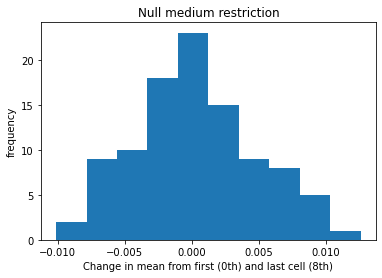

In [9]:
# null model medium restriction 
hist=[]
for k in range(kenerations):
    print(k)
    mu = [0] * number_cells
    sigma = [sigma_0] * number_cells
    s=[0] * number_cells
    mus=[mu]
    for trial in range(number_generations):
        temp_mu = [0] * number_cells
        temp_sigma = [1] * number_cells 
        for i, mean in enumerate(mu):
            s[i] = np.random.normal(loc=mean,scale=sigma[i],size=N) 
            mu_loop = mu[:i] + mu[i+1:]
            for j, meanj in enumerate(mu_loop):
                np.append(s[i],np.random.normal(loc=mean,scale=sigma[i],size=int(N/5))) 
            temp_mu[i] = round(np.mean(s[i]),2)
            temp_sigma[i] = round(np.std(s[i]),2)
        mu = temp_mu
        sigma = temp_sigma
        mus.append(mu)
    mus = pd.DataFrame(mus,columns=range(number_cells),index=range(number_generations+1))
    #s = sns.heatmap(mus,cmap="PiYG");
    #s.set(xlabel='Cells',ylabel='Generations')
    #s;
    print(sigma[0]/2+sigma[-1]/2)
    hist.append((mus.iloc[number_generations-1,0]-mus.iloc[number_generations-1,8])/kenerations)
print(hist)
plt.hist(hist,bins='auto')
plt.xlabel("Change in mean from first (0th) and last cell (8th)")
plt.ylabel("frequency")
plt.title('Null medium restriction')
plt.savefig('../data/null_med_restriction.png')

0
0.9400000000000001
1
0.9299999999999999
2
0.86
3
1.06
4
0.86
5
0.99
6
0.985
7
1.1749999999999998
8
0.935
9
1.24
10
0.8200000000000001
11
0.855
12
0.855
13
0.96
14
0.755
15
0.75
16
0.7949999999999999
17
1.205
18
1.195
19
0.765
20
0.96
21
0.8700000000000001
22
1.055
23
0.7949999999999999
24
0.91
25
0.7050000000000001
26
0.775
27
0.835
28
0.605
29
1.01
30
0.815
31
0.765
32
0.83
33
1.0899999999999999
34
0.895
35
0.915
36
0.825
37
1.17
38
0.815
39
0.915
40
0.9199999999999999
41
0.6
42
0.995
43
0.87
44
0.7949999999999999
45
0.87
46
1.005
47
1.205
48
1.065
49
1.1949999999999998
50
0.74
51
0.69
52
0.99
53
0.8400000000000001
54
0.845
55
1.2850000000000001
56
0.915
57
1.04
58
1.24
59
0.9750000000000001
60
0.7949999999999999
61
0.9299999999999999
62
0.9199999999999999
63
0.905
64
0.925
65
0.945
66
0.6950000000000001
67
1.0350000000000001
68
0.8700000000000001
69
0.8500000000000001
70
1.2400000000000002
71
0.745
72
1.1400000000000001
73
0.8999999999999999
74
1.04
75
0.855
76
0.96
77
0.72
78
0.70

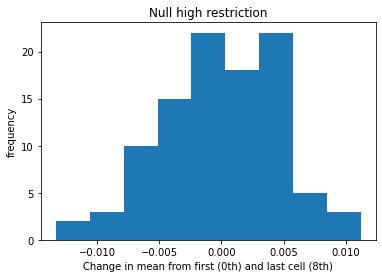

In [10]:
# null model high restriction 
hist=[]
for k in range(kenerations):
    print(k)

    mu = [0] * number_cells
    sigma = [1] * number_cells
    s=[0] * number_cells
    mus=[mu]
    for trial in range(number_generations):
        temp_mu = [0] * number_cells
        temp_sigma = [1] * number_cells 
        for i, mean in enumerate(mu):
            s[i] = np.random.normal(loc=mean,scale=sigma[i],size=N) 
            mu_loop = mu[:i] + mu[i+1:]
            for j, meanj in enumerate(mu_loop):
                np.append(s[i],np.random.normal(loc=mean,scale=sigma[i],size=int(N/10))) 
            temp_mu[i] = round(np.mean(s[i]),2)
            temp_sigma[i] = round(np.std(s[i]),2)
        mu = temp_mu
        sigma = temp_sigma
        mus.append(mu)
    mus = pd.DataFrame(mus,columns=range(number_cells),index=range(number_generations+1))
    #s = sns.heatmap(mus,cmap="PiYG");
    #s.set(xlabel='Cells',ylabel='Generations')
    #s;
    print(sigma[0]/2+sigma[-1]/2)
    hist.append((mus.iloc[number_generations-1,0]-mus.iloc[number_generations-1,8])/kenerations)
print(hist)
plt.hist(hist,bins='auto')
plt.xlabel("Change in mean from first (0th) and last cell (8th)")
plt.ylabel("frequency")
plt.title('Null high restriction')
plt.savefig('../data/null_high_restriction.png')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[0.0039000000000000003, 0.0052, 0.0044, -0.0037, -0.0036, -0.005699999999999999, -0.0018, 0.0035000000000000005, -0.0053, 0.004699999999999999, 0.0049, 0.0006000000000000002, -0.0012, -0.0014000000000000002, -0.0014000000000000002, 0.0003000000000000001, 0.0052, 0.0004999999999999999, 0.0064, -0.0013999999999999998, -0.0086, -0.0047, 0.0075, 0.0036, -0.0075, 0.0054, 0.008, 0.0021000000000000003, 0.0007000000000000001, -0.0054, 9.999999999999982e-05, -0.0043, 0.0034999999999999996, -0.0031000000000000003, -0.0063, 0.0013, -0.0012, 0.0014000000000000002, 0.0034, -0.0024000000000000002, -0.0045000000000000005, 0.0039000000000000003, -0.0011, 0.0033, -0.005, -0.0083, 0.0043, 0.0076, 0.0019, 0.000700000000

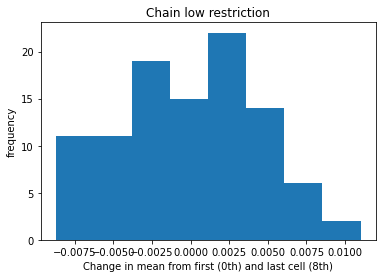

In [11]:
#second model
hist=[]
for k in range(kenerations):
    print(k)
    mu = [0] * number_cells
    sigma = [1] * number_cells
    s=[0] * number_cells
    mus=[mu]
    for trial in range(number_generations):
        temp_mu = [0] * number_cells
        temp_sigma = [1] * number_cells 
        for i, mean in enumerate(mu):
            s[i] = np.random.normal(loc=mean,scale=sigma[i],size=N)
            mu_loop = mu[:i] + mu[i+1:]
            start=i-1 # or 0
            end = i + 1 # or len(range(number_generations))
            check = True
            if start < 0:
                start = 0
                mu_loop = [mu[end]]
                check = False
            if end > len(mu)-1:
                end = -1
                mu_loop = [mu[start]]
                check = False
            if check:
                mu_loop = [mu[start],mu[end]] # mu[:i] + mu[i+1:]
            for j, meanj in enumerate(mu_loop):
                np.append(s[i],np.random.normal(loc=mean,scale=sigma[i],size=N))
            temp_mu[i] = round(np.mean(s[i]),2)
            temp_sigma[i] = round(np.std(s[i]),2)
        mu = temp_mu
        sigma = temp_sigma
        mus.append(mu)
    mus = pd.DataFrame(mus,columns=range(number_cells),index=range(number_generations+1))
    #s = sns.heatmap(mus,cmap="PiYG");
    #s.set(xlabel='Cells',ylabel='Generations')
    #s;
#    print(( (sigma[0]^2) + (sigma[-1]^2) )^0.5)
    hist.append((mus.iloc[number_generations-1,0]-mus.iloc[number_generations-1,8])/kenerations)
print(hist)
plt.hist(hist,bins='auto')
plt.xlabel("Change in mean from first (0th) and last cell (8th)")
plt.ylabel("frequency")
plt.title('Chain low restriction')
plt.savefig('../data/chain_low_restriction.png')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[-0.0095, 0.0057, -0.0004999999999999999, 0.0060999999999999995, -0.002, 0.0048, 0.00010000000000000009, -0.00010000000000000009, -0.0039000000000000003, 0.0031, -0.0041, -0.00020000000000000004, -0.0018000000000000002, 0.0031, 0.0043, -0.0082, -0.0098, -0.0019, 0.0075, 0.0017000000000000001, -0.0034000000000000002, -0.0042, 0.0027999999999999995, 0.0025, 0.0026, -0.0010000000000000002, -0.0060999999999999995, -0.0037, 0.0025, -0.0052, 0.004300000000000001, -0.0015, 0.0005, 0.0007000000000000001, -0.0033, -0.0062, 0.0024, -0.0024, 0.0034000000000000002, -0.0137, 0.0001999999999999999, -0.0092, -0.0044, 0.002, 0.008, 0.0034999999999999996, -0.0024000000000000002, -0.0017000000000000001, -0.0017, 0.0058

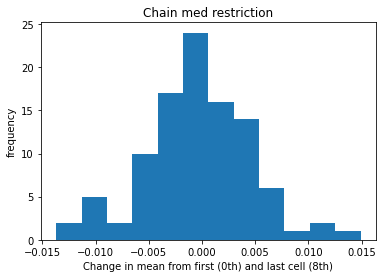

In [12]:
#second model medium restriction
hist = []
for k in range(kenerations):
    print(k)
    mu = [0] * number_cells
    sigma = [1] * number_cells
    s=[0] * number_cells
    mus=[mu]
    for trial in range(number_generations):
        temp_mu = [0] * number_cells
        temp_sigma = [1] * number_cells 
        for i, mean in enumerate(mu):
            s[i] = np.random.normal(loc=mean,scale=sigma[i],size=N)
            mu_loop = mu[:i] + mu[i+1:]
            start=i-1 # or 0
            end = i + 1 # or len(range(number_generations))
            check = True
            if start < 0:
                start = 0
                mu_loop = [mu[end]]
                check = False
            if end > len(mu)-1:
                end = -1
                mu_loop = [mu[start]]
                check = False
            if check:
                mu_loop = [mu[start],mu[end]] # mu[:i] + mu[i+1:]
            for j, meanj in enumerate(mu_loop):
                np.append(s[i],np.random.normal(loc=mean,scale=sigma[i],size=int(N/5)))
            temp_mu[i] = round(np.mean(s[i]),2)
            temp_sigma[i] = round(np.std(s[i]),2)
        mu = temp_mu
        sigma = temp_sigma
        mus.append(mu)
    mus = pd.DataFrame(mus,columns=range(number_cells),index=range(number_generations+1))
    #s = sns.heatmap(mus,cmap="PiYG");
    #s.set(xlabel='Cells',ylabel='Generations')
    #s;
#    print(( (sigma[0]^2) + (sigma[-1]^2) )^0.5)
    hist.append((mus.iloc[number_generations-1,0]-mus.iloc[number_generations-1,8])/kenerations)
print(hist)
plt.hist(hist,bins='auto')
plt.xlabel("Change in mean from first (0th) and last cell (8th)")
plt.ylabel("frequency")
plt.title('Chain med restriction')
plt.savefig('../data/chain_med_restriction.png')

In [ ]:
##### second model high restriction
hist = []
for k in range(kenerations):
    print(k)
    mu = [0] * number_cells
    sigma = [1] * number_cells
    s=[0] * number_cells
    mus=[mu]
    for trial in range(number_generations):
        temp_mu = [0] * number_cells
        temp_sigma = [1] * number_cells 
        for i, mean in enumerate(mu):
            s[i] = np.random.normal(loc=mean,scale=sigma[i],size=N)
            mu_loop = mu[:i] + mu[i+1:]
            start=i-1 # or 0
            end = i + 1 # or len(range(number_generations))
            check = True
            if start < 0:
                start = 0
                mu_loop = [mu[end]]
                check = False
            if end > len(mu)-1:
                end = -1
                mu_loop = [mu[start]]
                check = False
            if check:
                mu_loop = [mu[start],mu[end]] # mu[:i] + mu[i+1:]
            for j, meanj in enumerate(mu_loop):
                np.append(s[i],np.random.normal(loc=mean,scale=sigma[i],size=int(N/10)))
            temp_mu[i] = round(np.mean(s[i]),2)
            temp_sigma[i] = round(np.std(s[i]),2)
        mu = temp_mu
        sigma = temp_sigma
        mus.append(mu)
    mus = pd.DataFrame(mus,columns=range(number_cells),index=range(number_generations+1))
    #s = sns.heatmap(mus,cmap="PiYG");
    #s.set(xlabel='Cells',ylabel='Generations')
    #s;
#    print(( (sigma[0]^2) + (sigma[-1]^2) )^0.5)
    hist.append((mus.iloc[number_generations-1,0]-mus.iloc[number_generations-1,8])/kenerations)
print(hist)
plt.hist(hist,bins='auto')
plt.xlabel("Change in mean from first (0th) and last cell (8th)")
plt.ylabel("frequency")
plt.title('Chain high restriction')
plt.savefig('../data/chain_high_restriction.png')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[0.0060999999999999995, -0.0073, 0.0008000000000000001, 0.0038, 0.0017, -0.0031999999999999997, 0.00010000000000000009, 0.0032, 0.008100000000000001, -0.0118, -0.0007000000000000001, -0.0034999999999999996, 0.0007999999999999999, -0.0031000000000000003, -0.0030000000000000005, 0.01, 9.999999999999982e-05, 0.0093, -0.0004999999999999999, 0.0019, 0.0004999999999999999, 0.0037, 0.0004000000000000001, -0.0034000000000000002, 0.0005000000000000001, -0.0115, 0.006000000000000001, -0.0013, -0.0027, -0.004899999999999999, 0.0019000000000000002, 0.011200000000000002, 0.0023, -0.0035000000000000005, -0.001, 0.0018, 0.0017000000000000001, -0.008, 0.0039000000000000003, 0.0031, -0.0025, 0.0091, -0.0086, -0.0004, 

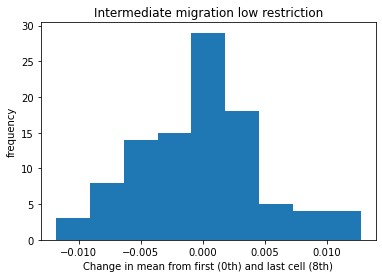

In [13]:
#intermediate migration medium restriction
hist = []
for k in range(kenerations):
    print(k)
    mu = [0] * number_cells
    sigma = [1] * number_cells
    s=[0] * number_cells
    mus=[mu]
    for trial in range(number_generations):
        temp_mu = [0] * number_cells
        temp_sigma = [1] * number_cells 
        for i, mean in enumerate(mu):
            s[i] = np.random.normal(loc=mean,scale=sigma[i],size=N)
            mu_loop = mu[:i] + mu[i+1:]
            start=i-1 # or 0
            end = i + 1 # or len(range(number_generations))
            check = True
            if start < 0:
                start = 0
                mu_loop = [mu[end]]
                check = False
            if end > len(mu)-1:
                end = -1
                mu_loop = [mu[start]]
                check = False
            if check:
                mu_loop = [mu[start],mu[end]] # mu[:i] + mu[i+1:]

            if i == 2:
                mu_loop = [mu[start],mu[6],mu[end]] # mu[:i] + mu[i+1:]

            if i == 6:
                mu_loop = [mu[start],mu[2],mu[end]] # mu[:i] + mu[i+1:]


            for j, meanj in enumerate(mu_loop):
                np.append(s[i],np.random.normal(loc=mean,scale=sigma[i],size=N))
            temp_mu[i] = round(np.mean(s[i]),2)
            temp_sigma[i] = round(np.std(s[i]),2)
        mu = temp_mu
        sigma = temp_sigma
        mus.append(mu)
    mus = pd.DataFrame(mus,columns=range(number_cells),index=range(number_generations+1))
    #s = sns.heatmap(mus,cmap="PiYG");
    #s.set(xlabel='Cells',ylabel='Generations')
    #s;
    hist.append((mus.iloc[number_generations-1,0]-mus.iloc[number_generations-1,8])/kenerations)
print(hist)
plt.hist(hist,bins='auto')
plt.xlabel("Change in mean from first (0th) and last cell (8th)")
plt.ylabel("frequency")
plt.title('Intermediate migration low restriction')
plt.savefig('../data/inter_mig_low_restriction.png')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[-0.0079, 0.0053, -0.0128, 0.0019000000000000002, -0.0028000000000000004, 0.0027999999999999995, -0.0105, 0.0036, 0.006199999999999999, 0.0018000000000000002, 0.006999999999999999, -0.0006000000000000001, -0.004399999999999999, -0.0025, 0.00030000000000000024, 0.0044, 0.0101, 0.003, 0.0033, -0.0034000000000000002, -0.0068000000000000005, -0.0013, -0.0034000000000000002, -0.0009999999999999998, 0.0027, -0.00010000000000000009, 0.0036, 0.0006, -0.0006, -0.006999999999999999, 0.00020000000000000017, 0.0041, -0.001, 0.0053, 0.0028000000000000004, 0.006900000000000001, -0.004, 0.0029000000000000002, 0.0053, 0.0032, 0.0070999999999999995, -0.0052, 0.006499999999999999, -0.0017, -0.0022, 0.0048, -0.007800000

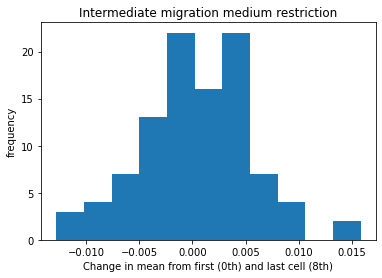

In [17]:
#intermediate migration medium restriction
hist = []
for k in range(kenerations):
    print(k)
    mu = [0] * number_cells
    sigma = [1] * number_cells
    s=[0] * number_cells
    mus=[mu]
    for trial in range(number_generations):
        temp_mu = [0] * number_cells
        temp_sigma = [1] * number_cells 
        for i, mean in enumerate(mu):
            s[i] = np.random.normal(loc=mean,scale=sigma[i],size=N)
            mu_loop = mu[:i] + mu[i+1:]
            start=i-1 # or 0
            end = i + 1 # or len(range(number_generations))
            check = True
            if start < 0:
                start = 0
                mu_loop = [mu[end]]
                check = False
            if end > len(mu)-1:
                end = -1
                mu_loop = [mu[start]]
                check = False
            if check:
                mu_loop = [mu[start],mu[end]] # mu[:i] + mu[i+1:]

            if i == 2:
                mu_loop = [mu[start],mu[6],mu[end]] # mu[:i] + mu[i+1:]

            if i == 6:
                mu_loop = [mu[start],mu[2],mu[end]] # mu[:i] + mu[i+1:]


            for j, meanj in enumerate(mu_loop):
                np.append(s[i],np.random.normal(loc=mean,scale=sigma[i],size=int(N/5)))
            temp_mu[i] = round(np.mean(s[i]),2)
            temp_sigma[i] = round(np.std(s[i]),2)
        mu = temp_mu
        sigma = temp_sigma
        mus.append(mu)
    mus = pd.DataFrame(mus,columns=range(number_cells),index=range(number_generations+1))
    #s = sns.heatmap(mus,cmap="PiYG");
    #s.set(xlabel='Cells',ylabel='Generations')
    #s;
    hist.append((mus.iloc[number_generations-1,0]-mus.iloc[number_generations-1,8])/kenerations)
print(hist)
plt.hist(hist,bins='auto')
plt.xlabel("Change in mean from first (0th) and last cell (8th)")
plt.ylabel("frequency")
plt.title('Intermediate migration medium restriction')
plt.savefig('../data/inter_mig_mid_restriction.png')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[-0.0013, 0.0029, 0.0051, -0.0016, 0.0082, 0.0073, 0.0004000000000000001, 0.0082, 0.0030999999999999995, 0.0037, 0.0106, -0.0019, -0.0020999999999999994, -0.005600000000000001, 0.005599999999999999, 0.0024000000000000002, -0.0063999999999999994, 0.0022, -0.0052, 0.0022, 0.0034999999999999996, -0.0024, -0.0052, -0.001, 0.00030000000000000024, 0.0006, 0.0045, 0.00010000000000000009, -0.0045000000000000005, -0.0034, -0.0018, 0.0068, -0.0035000000000000005, 0.008, -0.0017000000000000001, 0.0004999999999999999, -0.0058, 0.0007000000000000001, -0.0013, -0.0013, -0.0068, -0.0038, 0.0060999999999999995, -0.0062, 0.0031999999999999997, 0.0024, 0.0046, -0.0013, 0.0012, 0.0088, 0.006, 0.0042, 0.0063, -0.00140000

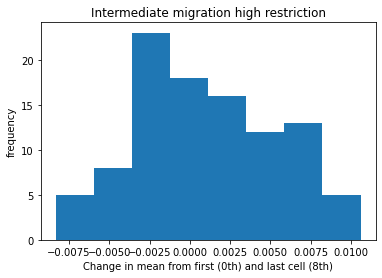

In [18]:
#intermediate migration high restriction
hist = []
for k in range(kenerations):
    print(k)
    mu = [0] * number_cells
    sigma = [1] * number_cells
    s=[0] * number_cells
    mus=[mu]
    for trial in range(number_generations):
        temp_mu = [0] * number_cells
        temp_sigma = [1] * number_cells 
        for i, mean in enumerate(mu):
            s[i] = np.random.normal(loc=mean,scale=sigma[i],size=N)
            mu_loop = mu[:i] + mu[i+1:]
            start=i-1 # or 0
            end = i + 1 # or len(range(number_generations))
            check = True
            if start < 0:
                start = 0
                mu_loop = [mu[end]]
                check = False
            if end > len(mu)-1:
                end = -1
                mu_loop = [mu[start]]
                check = False
            if check:
                mu_loop = [mu[start],mu[end]] # mu[:i] + mu[i+1:]

            if i == 2:
                mu_loop = [mu[start],mu[6],mu[end]] # mu[:i] + mu[i+1:]

            if i == 6:
                mu_loop = [mu[start],mu[2],mu[end]] # mu[:i] + mu[i+1:]


            for j, meanj in enumerate(mu_loop):
                np.append(s[i],np.random.normal(loc=mean,scale=sigma[i],size=int(N/10)))
            temp_mu[i] = round(np.mean(s[i]),2)
            temp_sigma[i] = round(np.std(s[i]),2)
        mu = temp_mu
        sigma = temp_sigma
        mus.append(mu)
    mus = pd.DataFrame(mus,columns=range(number_cells),index=range(number_generations+1))
    #s = sns.heatmap(mus,cmap="PiYG");
    #s.set(xlabel='Cells',ylabel='Generations')
    #s;
    hist.append((mus.iloc[number_generations-1,0]-mus.iloc[number_generations-1,8])/kenerations)
print(hist)
plt.hist(hist,bins='auto')
plt.xlabel("Change in mean from first (0th) and last cell (8th)")
plt.ylabel("frequency")
plt.title('Intermediate migration high restriction')
plt.savefig('../data/chain_high_restriction.png')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



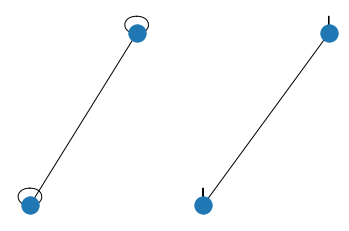

In [16]:
#networkX resampling 
import networkx as nx
G = nx.Graph()
generations_array = [0]*number_generations
G.add_node(1,ID=1,sampling=[[0]]*number_generations,
           mu=[1]*number_generations,
           sigma=[0]*number_generations)
G.add_node(2,ID=1,sampling=[0]*number_generations,
           mu=[1]*number_generations,
           sigma=[0]*number_generations)
#
G.add_edge(1,2)
G.add_edge(1,1)
G.add_edge(2,2)



#elist = [(2, 3), (1, 4), (4, 2)]
#G.add_edges_from(elist)
#elist = [('a', 'b', 5.0), ('b', 'c', 3.0), ('a', 'c', 1.0), ('c', 'd', 7.3)]
#G.add_weighted_edges_from(elist)

import matplotlib.pyplot as plt
#G = nx.cubical_graph()
subax1 = plt.subplot(121)
nx.draw(G) # default spring_layout
subax2 = plt.subplot(122)
nx.draw(G)#, pos=nx.circular_layout(G), node_color='r', edge_color='b')

for trial in range(number_generations):
    for node in G.nodes(data=True):
        print(node)

for node in G.edges(data=True):
    print(node)

In [28]:
dir(G)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes',
 'number_of_edges',
 'number_of_nodes',
 'order',
 'remove_edg